🧪 MODEL TESTING SETUP:
   Training data: 6,570 records (2021-2023)
   Test data: 2,196 records (2024)
   Sections: 6
🧪 STARTING COMPREHENSIVE MODEL VALIDATION

=== TRAINING DATA ANALYSIS (2021-2023) ===

📊 CORRELATION ANALYSIS:
   SEC-001: 0.892
   SEC-002: 0.908
   SEC-003: 0.873
   SEC-004: 0.902
   SEC-005: 0.983
   SEC-006: 0.969

📈 TRAINING STATISTICS:
   SEC-001:
      Working days: 727
      Employees: 2.9 ± 1.5 (range: 0-12)
      Task time: 1005 ± 584 minutes
   SEC-002:
      Working days: 727
      Employees: 4.3 ± 1.7 (range: 0-12)
      Task time: 1609 ± 657 minutes
   SEC-003:
      Working days: 727
      Employees: 3.0 ± 1.4 (range: 0-9)
      Task time: 1049 ± 529 minutes
   SEC-004:
      Working days: 727
      Employees: 3.2 ± 1.6 (range: 0-11)
      Task time: 1118 ± 607 minutes
   SEC-005:
      Working days: 727
      Employees: 7.4 ± 3.7 (range: 0-26)
      Task time: 2905 ± 1529 minutes
   SEC-006:
      Working days: 727
      Employees: 6.5 ± 2.6 (range: 0-19

21:28:08 - cmdstanpy - INFO - Chain [1] start processing
21:28:09 - cmdstanpy - INFO - Chain [1] done processing


      → Forecasted 241 working days
   Forecasting SEC-002...


21:28:09 - cmdstanpy - INFO - Chain [1] start processing
21:28:10 - cmdstanpy - INFO - Chain [1] done processing


      → Forecasted 241 working days
   Forecasting SEC-003...


21:28:10 - cmdstanpy - INFO - Chain [1] start processing
21:28:10 - cmdstanpy - INFO - Chain [1] done processing


      → Forecasted 241 working days
   Forecasting SEC-004...


21:28:11 - cmdstanpy - INFO - Chain [1] start processing
21:28:11 - cmdstanpy - INFO - Chain [1] done processing


      → Forecasted 241 working days
   Forecasting SEC-005...


21:28:11 - cmdstanpy - INFO - Chain [1] start processing
21:28:11 - cmdstanpy - INFO - Chain [1] done processing


      → Forecasted 241 working days
   Forecasting SEC-006...


21:28:12 - cmdstanpy - INFO - Chain [1] start processing
21:28:12 - cmdstanpy - INFO - Chain [1] done processing


      → Forecasted 241 working days

=== CONVERTING TO 2024 EMPLOYEE PREDICTIONS ===

=== COMPREHENSIVE EVALUATION ===
🎯 OVERALL PERFORMANCE:
   MAE: 1.45 employees
   RMSE: 2.10 employees
   R²: 0.344
   Records evaluated: 1,446

📊 SECTION-WISE PERFORMANCE:
   SEC-001:
      MAE: 0.98, RMSE: 1.47, R²: -0.114
      Avg task/employee: 354.5 minutes
      Actual avg: 2.7, Predicted avg: 2.4
   SEC-002:
      MAE: 1.32, RMSE: 1.67, R²: -0.039
      Avg task/employee: 371.9 minutes
      Actual avg: 4.0, Predicted avg: 3.7
   SEC-003:
      MAE: 0.99, RMSE: 1.30, R²: -0.100
      Avg task/employee: 364.2 minutes
      Actual avg: 2.7, Predicted avg: 2.7
   SEC-004:
      MAE: 1.05, RMSE: 1.40, R²: -0.205
      Avg task/employee: 348.4 minutes
      Actual avg: 2.9, Predicted avg: 3.0
   SEC-005:
      MAE: 2.59, RMSE: 3.47, R²: -0.084
      Avg task/employee: 388.5 minutes
      Actual avg: 6.8, Predicted avg: 6.4
   SEC-006:
      MAE: 1.76, RMSE: 2.40, R²: -0.084
      Avg task/employee:

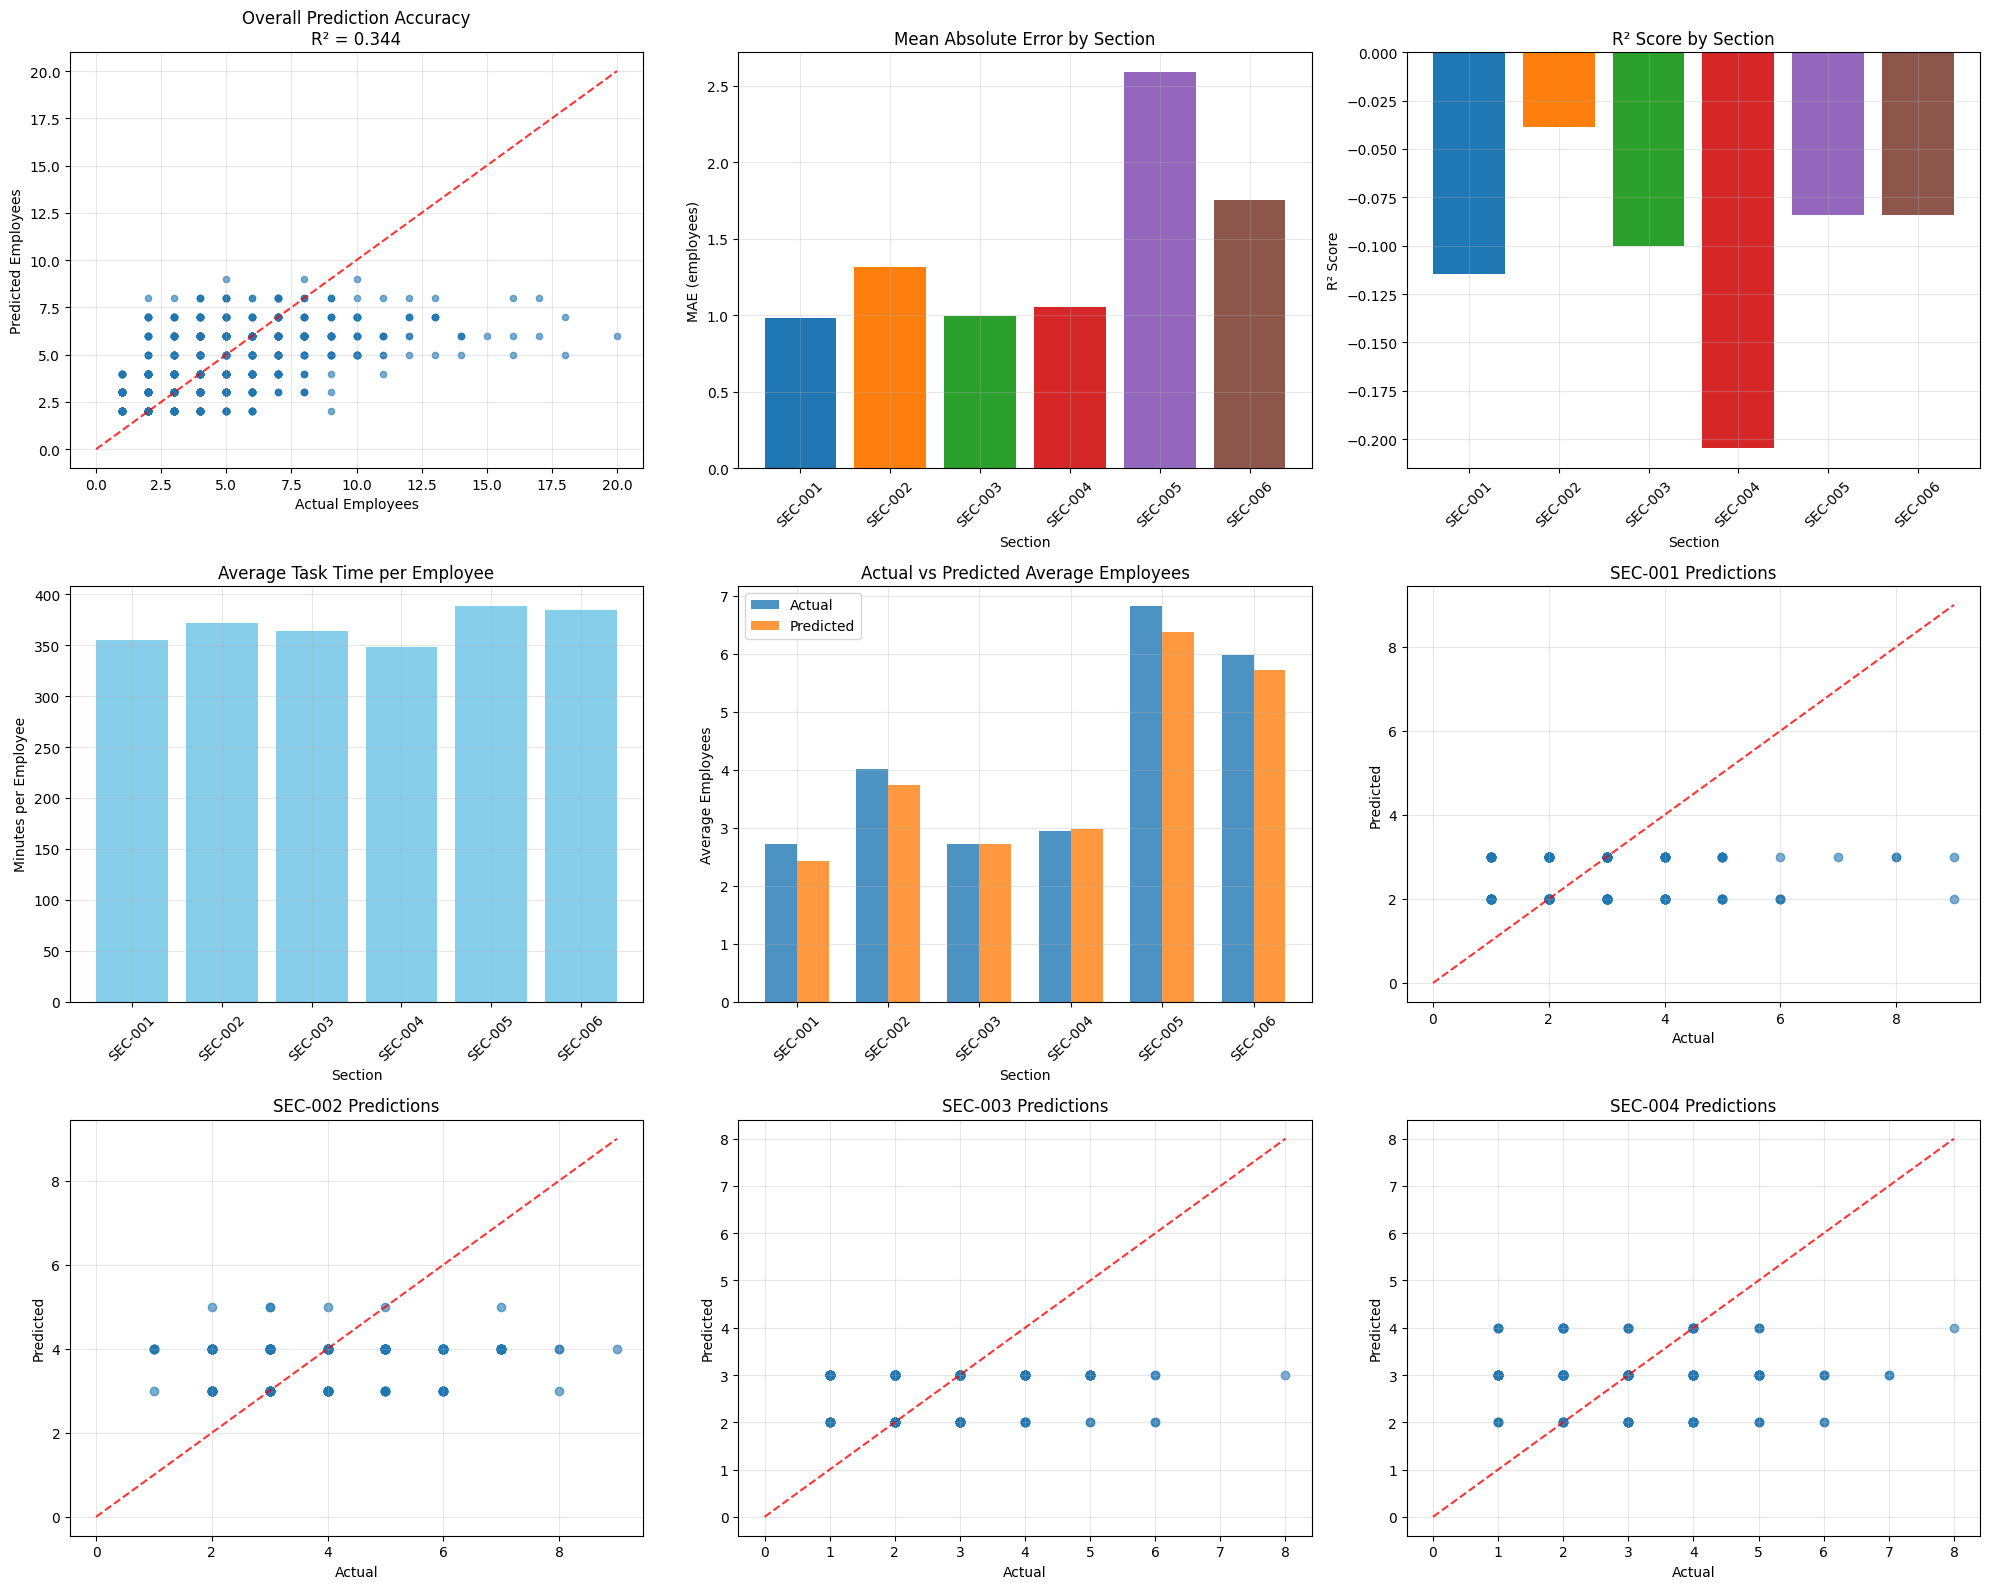

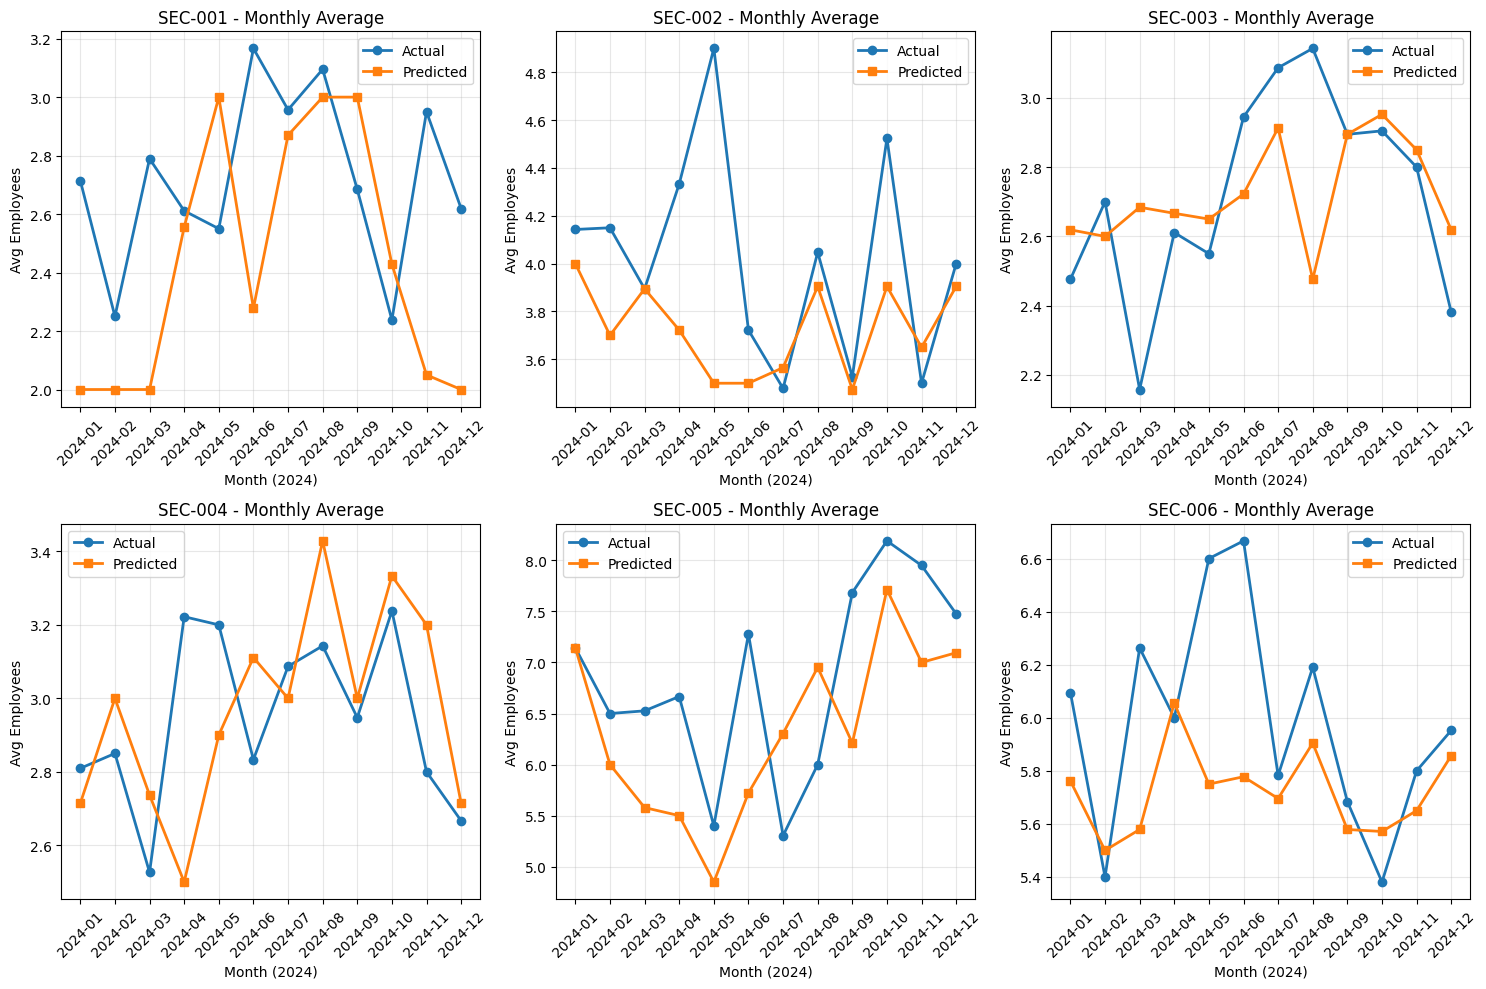


✅ VALIDATION COMPLETE!
📁 Files saved:
   - 2024_validation_predictions.csv
   - validation_performance_by_section.csv
   - model_validation_results.png
   - monthly_trends_comparison.png
\n📊 FINAL VALIDATION SUMMARY:
   Section    MAE   RMSE     R²  Avg_Task_Per_Employee  Working_Days  \
0  SEC-001  0.979  1.466 -0.114                354.539           241   
1  SEC-002  1.315  1.671 -0.039                371.926           241   
2  SEC-003  0.992  1.300 -0.100                364.230           241   
3  SEC-004  1.050  1.404 -0.205                348.404           241   
4  SEC-005  2.589  3.471 -0.084                388.537           241   
5  SEC-006  1.755  2.396 -0.084                384.215           241   

   Actual_Avg  Predicted_Avg  
0       2.718          2.436  
1       4.017          3.730  
2       2.726          2.722  
3       2.946          2.975  
4       6.826          6.369  
5       5.975          5.722  
\n⚠️  Consider model improvements before 2025 forecasting.


In [2]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import HuberRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class StaffingModelTester:
    def __init__(self, continuous_df):
        """
        Initialize with your continuous DataFrame for comprehensive testing
        
        Parameters:
        continuous_df: Complete DataFrame with 2021-2024 data
        """
        self.df = continuous_df.copy()
        self.df['date'] = pd.to_datetime(self.df['date'])
        
        # Create features
        self._prepare_features()
        
        # Split data for testing (Train: 2021-2023, Test: 2024)
        self.train_data = self.df[self.df['year'] <= 2023].copy()
        self.test_data = self.df[self.df['year'] == 2024].copy()
        
        # Model storage
        self.employee_models = {}
        self.task_time_models = {}
        self.results = {}
        
        print(f"🧪 MODEL TESTING SETUP:")
        print(f"   Training data: {len(self.train_data):,} records (2021-2023)")
        print(f"   Test data: {len(self.test_data):,} records (2024)")
        print(f"   Sections: {self.df['section_id'].nunique()}")
        
    def _prepare_features(self):
        """Add time-based features"""
        self.df['year'] = self.df['date'].dt.year
        self.df['month'] = self.df['date'].dt.month
        self.df['dayofweek'] = self.df['date'].dt.dayofweek
        self.df['quarter'] = self.df['date'].dt.quarter
        self.df['is_working_day'] = ((self.df['is_holiday'] == 0) & (self.df['is_weekend'] == 0)).astype(int)
        
    def analyze_training_data(self):
        """Analyze the training data correlations and patterns"""
        print("\n=== TRAINING DATA ANALYSIS (2021-2023) ===")
        
        working_train = self.train_data[self.train_data['is_working_day'] == 1]
        
        # Correlation analysis
        print("\n📊 CORRELATION ANALYSIS:")
        correlations = {}
        for section in working_train['section_id'].unique():
            section_data = working_train[working_train['section_id'] == section]
            if len(section_data) > 20:
                corr = section_data['employees_on_duty'].corr(section_data['total_task_time_minutes'])
                correlations[section] = corr
                print(f"   {section}: {corr:.3f}")
        
        # Basic statistics
        print(f"\n📈 TRAINING STATISTICS:")
        stats = working_train.groupby('section_id').agg({
            'employees_on_duty': ['count', 'mean', 'std', 'min', 'max'],
            'total_task_time_minutes': ['mean', 'std']
        }).round(2)
        
        for section in stats.index:
            emp_stats = stats.loc[section, 'employees_on_duty']
            task_stats = stats.loc[section, 'total_task_time_minutes']
            print(f"   {section}:")
            print(f"      Working days: {emp_stats['count']:.0f}")
            print(f"      Employees: {emp_stats['mean']:.1f} ± {emp_stats['std']:.1f} (range: {emp_stats['min']:.0f}-{emp_stats['max']:.0f})")
            print(f"      Task time: {task_stats['mean']:.0f} ± {task_stats['std']:.0f} minutes")
        
        return correlations
        
    def build_employee_models_from_training(self):
        """Build employee prediction models using only training data"""
        print("\n=== BUILDING MODELS FROM TRAINING DATA ===")
        
        working_train = self.train_data[self.train_data['is_working_day'] == 1]
        
        for section in working_train['section_id'].unique():
            section_data = working_train[working_train['section_id'] == section]
            
            if len(section_data) > 30:
                # Prepare features
                X = section_data[['total_task_time_minutes']].values
                y = section_data['employees_on_duty'].values
                
                # Robust regression
                model = HuberRegressor(epsilon=1.35)
                model.fit(X, y)
                
                # Calculate efficiency metrics
                valid_data = section_data[section_data['employees_on_duty'] > 0].copy()
                valid_data['task_per_emp'] = (
                    valid_data['total_task_time_minutes'] / valid_data['employees_on_duty']
                )
                
                self.employee_models[section] = {
                    'regression_model': model,
                    'avg_task_per_employee': valid_data['task_per_emp'].median(),
                    'min_employees': section_data['employees_on_duty'].min(),
                    'max_employees': section_data['employees_on_duty'].max(),
                    'training_r2': model.score(X, y)
                }
                
                print(f"   {section}: R² = {model.score(X, y):.3f}, Avg efficiency = {valid_data['task_per_emp'].median():.1f} min/emp")
                
    def forecast_task_time_for_2024(self):
        """Forecast task time for 2024 using training data"""
        print(f"\n=== FORECASTING 2024 TASK TIME ===")
        
        task_forecasts = {}
        working_train = self.train_data[self.train_data['is_working_day'] == 1]
        
        for section in working_train['section_id'].unique():
            print(f"   Forecasting {section}...")
            
            section_data = working_train[working_train['section_id'] == section].copy()
            
            if len(section_data) < 50:
                print(f"      ⚠️  Insufficient training data")
                continue
                
            # Prepare Prophet data
            prophet_df = section_data[['date', 'total_task_time_minutes']].copy()
            prophet_df.columns = ['ds', 'y']
            prophet_df = prophet_df.sort_values('ds')
            
            # Prophet model
            model = Prophet(
                yearly_seasonality=True,
                weekly_seasonality=False,
                daily_seasonality=False,
                changepoint_prior_scale=0.05,
                seasonality_prior_scale=8.0
            )
            
            model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
            model.add_seasonality(name='quarterly', period=91.25, fourier_order=3)
            
            # Fit
            model.fit(prophet_df)
            
            # Get 2024 working days for this section
            test_working = self.test_data[
                (self.test_data['section_id'] == section) & 
                (self.test_data['is_working_day'] == 1)
            ]['date'].values
            
            if len(test_working) > 0:
                future_df = pd.DataFrame({'ds': test_working})
                forecast = model.predict(future_df)
                forecast['yhat'] = forecast['yhat'].clip(lower=0)
                
                task_forecasts[section] = {
                    'dates': test_working,
                    'predictions': forecast['yhat'].values
                }
                
                self.task_time_models[section] = model
                print(f"      → Forecasted {len(test_working)} working days")
                
        return task_forecasts
        
    def convert_to_employee_predictions_2024(self, task_forecasts):
        """Convert 2024 task time forecasts to employee predictions"""
        print(f"\n=== CONVERTING TO 2024 EMPLOYEE PREDICTIONS ===")
        
        employee_predictions = {}
        
        for section, forecast_data in task_forecasts.items():
            if section not in self.employee_models:
                continue
                
            model_info = self.employee_models[section]
            dates = forecast_data['dates']
            predicted_task_time = forecast_data['predictions']
            
            # Regression prediction
            predicted_employees_reg = model_info['regression_model'].predict(
                predicted_task_time.reshape(-1, 1)
            )
            
            # Efficiency prediction
            predicted_employees_eff = predicted_task_time / model_info['avg_task_per_employee']
            
            # Weighted combination (higher weight on regression for high R²)
            r2_score = model_info['training_r2']
            weight_reg = 0.8 if r2_score > 0.9 else 0.6
            
            final_predictions = (
                weight_reg * predicted_employees_reg + 
                (1 - weight_reg) * predicted_employees_eff
            )
            
            # Apply constraints
            final_predictions = np.round(final_predictions).astype(int)
            final_predictions = np.clip(
                final_predictions,
                max(1, model_info['min_employees']),
                int(model_info['max_employees'] * 1.2)
            )
            
            employee_predictions[section] = {
                'dates': dates,
                'predictions': final_predictions
            }
            
        return employee_predictions
        
    def create_2024_predictions_dataframe(self, employee_predictions):
        """Create complete 2024 predictions DataFrame"""
        
        # Start with 2024 template
        predictions_df = self.test_data.copy()
        predictions_df['predicted_employee_count'] = 0
        
        # Fill working day predictions
        for section, pred_data in employee_predictions.items():
            dates = pred_data['dates']
            predictions = pred_data['predictions']
            
            for date, pred in zip(dates, predictions):
                mask = (predictions_df['section_id'] == section) & (predictions_df['date'] == date)
                predictions_df.loc[mask, 'predicted_employee_count'] = pred
                
        return predictions_df[['date', 'section_id', 'employees_on_duty', 
                              'total_task_time_minutes', 'predicted_employee_count', 'is_working_day']]
        
    def evaluate_predictions(self, predictions_df):
        """Comprehensive evaluation of predictions vs actual"""
        print(f"\n=== COMPREHENSIVE EVALUATION ===")
        
        # Focus on working days only
        working_predictions = predictions_df[predictions_df['is_working_day'] == 1].copy()
        
        # Overall metrics
        mae_overall = mean_absolute_error(working_predictions['employees_on_duty'], 
                                         working_predictions['predicted_employee_count'])
        rmse_overall = np.sqrt(mean_squared_error(working_predictions['employees_on_duty'], 
                                                 working_predictions['predicted_employee_count']))
        r2_overall = r2_score(working_predictions['employees_on_duty'], 
                             working_predictions['predicted_employee_count'])
        
        print(f"🎯 OVERALL PERFORMANCE:")
        print(f"   MAE: {mae_overall:.2f} employees")
        print(f"   RMSE: {rmse_overall:.2f} employees") 
        print(f"   R²: {r2_overall:.3f}")
        print(f"   Records evaluated: {len(working_predictions):,}")
        
        # Section-wise analysis
        section_results = []
        
        print(f"\n📊 SECTION-WISE PERFORMANCE:")
        for section in working_predictions['section_id'].unique():
            section_data = working_predictions[working_predictions['section_id'] == section]
            
            if len(section_data) > 0:
                mae_section = mean_absolute_error(section_data['employees_on_duty'], 
                                                section_data['predicted_employee_count'])
                rmse_section = np.sqrt(mean_squared_error(section_data['employees_on_duty'], 
                                                        section_data['predicted_employee_count']))
                r2_section = r2_score(section_data['employees_on_duty'], 
                                    section_data['predicted_employee_count'])
                
                # Average task time per employee (actual)
                valid_section = section_data[section_data['employees_on_duty'] > 0].copy()
                avg_task_per_emp = (valid_section['total_task_time_minutes'] / 
                                   valid_section['employees_on_duty']).mean()
                
                section_results.append({
                    'Section': section,
                    'MAE': mae_section,
                    'RMSE': rmse_section,
                    'R²': r2_section,
                    'Avg_Task_Per_Employee': avg_task_per_emp,
                    'Working_Days': len(section_data),
                    'Actual_Avg': section_data['employees_on_duty'].mean(),
                    'Predicted_Avg': section_data['predicted_employee_count'].mean()
                })
                
                print(f"   {section}:")
                print(f"      MAE: {mae_section:.2f}, RMSE: {rmse_section:.2f}, R²: {r2_section:.3f}")
                print(f"      Avg task/employee: {avg_task_per_emp:.1f} minutes")
                print(f"      Actual avg: {section_data['employees_on_duty'].mean():.1f}, "
                      f"Predicted avg: {section_data['predicted_employee_count'].mean():.1f}")
        
        results_df = pd.DataFrame(section_results)
        self.results = {
            'overall': {
                'mae': mae_overall,
                'rmse': rmse_overall,
                'r2': r2_overall
            },
            'section_wise': results_df,
            'predictions': working_predictions
        }
        
        return results_df
        
    def create_visualizations(self):
        """Create comprehensive visualizations"""
        print(f"\n=== CREATING VISUALIZATIONS ===")
        
        if not self.results:
            print("No results to visualize. Run evaluation first.")
            return
            
        working_data = self.results['predictions']
        section_results = self.results['section_wise']
        
        # Create figure with subplots
        fig = plt.figure(figsize=(20, 16))
        
        # 1. Overall scatter plot
        plt.subplot(3, 3, 1)
        plt.scatter(working_data['employees_on_duty'], working_data['predicted_employee_count'], 
                   alpha=0.6, s=20)
        plt.plot([0, working_data['employees_on_duty'].max()], 
                [0, working_data['employees_on_duty'].max()], 'r--', alpha=0.8)
        plt.xlabel('Actual Employees')
        plt.ylabel('Predicted Employees')
        plt.title(f'Overall Prediction Accuracy\nR² = {self.results["overall"]["r2"]:.3f}')
        plt.grid(True, alpha=0.3)
        
        # 2. MAE by section
        plt.subplot(3, 3, 2)
        plt.bar(section_results['Section'], section_results['MAE'], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
        plt.xlabel('Section')
        plt.ylabel('MAE (employees)')
        plt.title('Mean Absolute Error by Section')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # 3. R² by section
        plt.subplot(3, 3, 3)
        plt.bar(section_results['Section'], section_results['R²'], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
        plt.xlabel('Section')
        plt.ylabel('R² Score')
        plt.title('R² Score by Section')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # 4. Average task time per employee by section
        plt.subplot(3, 3, 4)
        plt.bar(section_results['Section'], section_results['Avg_Task_Per_Employee'], 
                color='skyblue')
        plt.xlabel('Section')
        plt.ylabel('Minutes per Employee')
        plt.title('Average Task Time per Employee')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # 5. Actual vs Predicted averages
        plt.subplot(3, 3, 5)
        x = np.arange(len(section_results))
        width = 0.35
        plt.bar(x - width/2, section_results['Actual_Avg'], width, label='Actual', alpha=0.8)
        plt.bar(x + width/2, section_results['Predicted_Avg'], width, label='Predicted', alpha=0.8)
        plt.xlabel('Section')
        plt.ylabel('Average Employees')
        plt.title('Actual vs Predicted Average Employees')
        plt.xticks(x, section_results['Section'], rotation=45)
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 6-9. Individual section scatter plots
        sections = working_data['section_id'].unique()[:4]  # First 4 sections
        for i, section in enumerate(sections, 6):
            plt.subplot(3, 3, i)
            section_data = working_data[working_data['section_id'] == section]
            plt.scatter(section_data['employees_on_duty'], 
                       section_data['predicted_employee_count'], alpha=0.6)
            plt.plot([0, section_data['employees_on_duty'].max()], 
                    [0, section_data['employees_on_duty'].max()], 'r--', alpha=0.8)
            plt.xlabel('Actual')
            plt.ylabel('Predicted')
            plt.title(f'{section} Predictions')
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('model_validation_results.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Time series plot
        plt.figure(figsize=(15, 10))
        
        # Create monthly aggregated data for visualization
        working_data['year_month'] = working_data['date'].dt.to_period('M')
        monthly_comparison = working_data.groupby(['year_month', 'section_id']).agg({
            'employees_on_duty': 'mean',
            'predicted_employee_count': 'mean'
        }).reset_index()
        
        sections = monthly_comparison['section_id'].unique()
        for i, section in enumerate(sections):
            plt.subplot(2, 3, i+1)
            section_monthly = monthly_comparison[monthly_comparison['section_id'] == section]
            
            plt.plot(section_monthly['year_month'].astype(str), 
                    section_monthly['employees_on_duty'], 
                    'o-', label='Actual', linewidth=2)
            plt.plot(section_monthly['year_month'].astype(str), 
                    section_monthly['predicted_employee_count'], 
                    's-', label='Predicted', linewidth=2)
            
            plt.title(f'{section} - Monthly Average')
            plt.xlabel('Month (2024)')
            plt.ylabel('Avg Employees')
            plt.legend()
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('monthly_trends_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    def run_complete_validation(self):
        """Run the complete validation pipeline"""
        print("🧪 STARTING COMPREHENSIVE MODEL VALIDATION")
        print("=" * 60)
        
        # Step 1: Analyze training data
        correlations = self.analyze_training_data()
        
        # Step 2: Build models from training data only
        self.build_employee_models_from_training()
        
        # Step 3: Forecast 2024 task time
        task_forecasts = self.forecast_task_time_for_2024()
        
        # Step 4: Convert to employee predictions
        employee_predictions = self.convert_to_employee_predictions_2024(task_forecasts)
        
        # Step 5: Create predictions DataFrame
        predictions_df = self.create_2024_predictions_dataframe(employee_predictions)
        
        # Step 6: Evaluate predictions
        section_results = self.evaluate_predictions(predictions_df)
        
        # Step 7: Create visualizations
        self.create_visualizations()
        
        # Step 8: Save results
        predictions_df.to_csv('2024_validation_predictions.csv', index=False)
        section_results.to_csv('validation_performance_by_section.csv', index=False)
        
        print(f"\n✅ VALIDATION COMPLETE!")
        print(f"📁 Files saved:")
        print(f"   - 2024_validation_predictions.csv")
        print(f"   - validation_performance_by_section.csv")
        print(f"   - model_validation_results.png")
        print(f"   - monthly_trends_comparison.png")
        
        return section_results, predictions_df

# USAGE WITH YOUR CONTINUOUS DATAFRAME:

# Load your continuous DataFrame (2021-2024 data)
df = pd.read_csv('final_df_binary.csv')

# Initialize tester
tester = StaffingModelTester(df)

# Run complete validation
section_performance, validation_predictions = tester.run_complete_validation()

# View results
print("\\n📊 FINAL VALIDATION SUMMARY:")
print(section_performance.round(3))

# If results look good, proceed with 2025 forecasting
if tester.results['overall']['mae'] < 1.0:
    print("\\n✅ Model performance acceptable! Ready for 2025 forecasting.")
else:
    print("\\n⚠️  Consider model improvements before 2025 forecasting.")
